## Capstone #2: Public Transportation Transjakarta Analysis
# Introduction
This dataset contains transaction records from a public transport service, detailing customer interactions
<br>
 and trip information. Each record is uniquely identified by a transaction ID (transID) and includes
<br>
 various attributes related to customer profiles, trip details, and payment information.

Key Attributes:
 - transID: A unique identifier for every transaction, ensuring traceability of each record.

 - payCardID: The primary identifier for customers, corresponding to the payment card used for ticketing during entrance and exit.

 - payCardBank: The name of the bank that issued the customer's payment card.

 - payCardName: The name of the customer as printed on the payment card.

 - payCardSex: The gender of the customer as indicated on the payment card.

 - payCardBirthDate: The birth year of the customer, used for age analysis.

 - corridorID: A unique identifier for the route, facilitating grouping and analysis of trips.

 - corridorName: Describes the route, including the starting and finishing points of the journey.

 - direction: Indicates the direction of the trip, with 0 for outbound (Go) and 1 for inbound (Back).

 - tapInStops: The ID of the stop where the customer taps in (enters the transport system).

 - tapInStopsName: The name of the tap-in stop, providing context to the entry point.

 - tapInStopsLat and tapInStopsLon: The latitude and longitude of the tap-in stop, respectively, useful for geospatial analysis.

 - stopStartSeq: The sequence of stops along the route, indicating the order of stops related to the direction of travel.

 - tapInTime: The date and time of the tap-in, critical for trip duration calculations and time-based analyses.

 - tapOutStops: The ID of the stop where the customer taps out (exits the transport system).

 - tapOutStopsName: The name of the tap-out stop, providing context to the exit point.

 - tapOutStopsLat and tapOutStopsLon: The latitude and longitude of the tap-out stop, useful for geospatial analysis.

 - stopEndSeq: The sequence of stops at the exit, indicating the order of stops related to the direction of travel.

 - tapOutTime: The date and time of the tap-out, essential for calculating trip duration.

 - payAmount: The amount paid by the customer for the trip, with some transactions recorded as free.

In [2]:
# Import usual libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Access dataset

filepath = r'C:\Users\Asus\Desktop\DS Purwa\Module_2\Capstone Module 2\Transjakarta.csv'
df_raw = pd.read_csv(filepath)
df = df_raw.copy()
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
# Data identification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [5]:
# Checking missing values in the dataset

df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [6]:
# Perform descriptive statistics

df.describe(include='all')

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,37900,3.790000e+04,37900,37900,37900,37900.000000,36643,35970,37900.000000,36687,...,37900.000000,37900.000000,37900,35611,36556,36556.000000,36556.000000,36556.000000,36556,36893.000000
unique,37900,NaN,6,1993,2,NaN,221,216,NaN,2570,...,NaN,NaN,37079,2230,2248,NaN,NaN,NaN,35908,NaN
top,EIIW227B8L34VB,NaN,dki,Fathonah Saefullah,F,NaN,1T,Cibubur - Balai Kota,NaN,P00170,...,NaN,NaN,2023-04-25 06:23:00,P00016,BKN,NaN,NaN,NaN,2023-04-10 19:10:15,NaN
freq,1,NaN,18743,80,20157,NaN,400,391,NaN,236,...,NaN,NaN,3,306,316,NaN,NaN,NaN,3,NaN
mean,NaN,4.250060e+17,NaN,NaN,NaN,1990.089314,NaN,NaN,0.500633,NaN,...,106.841554,13.572480,NaN,NaN,NaN,-6.214651,106.841233,21.219909,NaN,2699.712683
std,NaN,1.321699e+18,NaN,NaN,NaN,13.051482,NaN,NaN,0.500006,NaN,...,0.060369,12.237623,NaN,NaN,NaN,0.059022,0.060999,13.800689,NaN,4212.225592
min,NaN,6.040368e+10,NaN,NaN,NaN,1946.000000,NaN,NaN,0.000000,NaN,...,106.614730,0.000000,NaN,NaN,NaN,-6.394973,106.614730,1.000000,NaN,0.000000
25%,NaN,1.800442e+14,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,...,106.803470,4.000000,NaN,NaN,NaN,-6.247225,106.801750,11.000000,NaN,0.000000
50%,NaN,3.507947e+15,NaN,NaN,NaN,1990.000000,NaN,NaN,1.000000,NaN,...,106.834830,10.000000,NaN,NaN,NaN,-6.214718,106.834580,18.000000,NaN,3500.000000
75%,NaN,4.699023e+15,NaN,NaN,NaN,2001.000000,NaN,NaN,1.000000,NaN,...,106.882270,19.000000,NaN,NaN,NaN,-6.174736,106.883030,29.000000,NaN,3500.000000


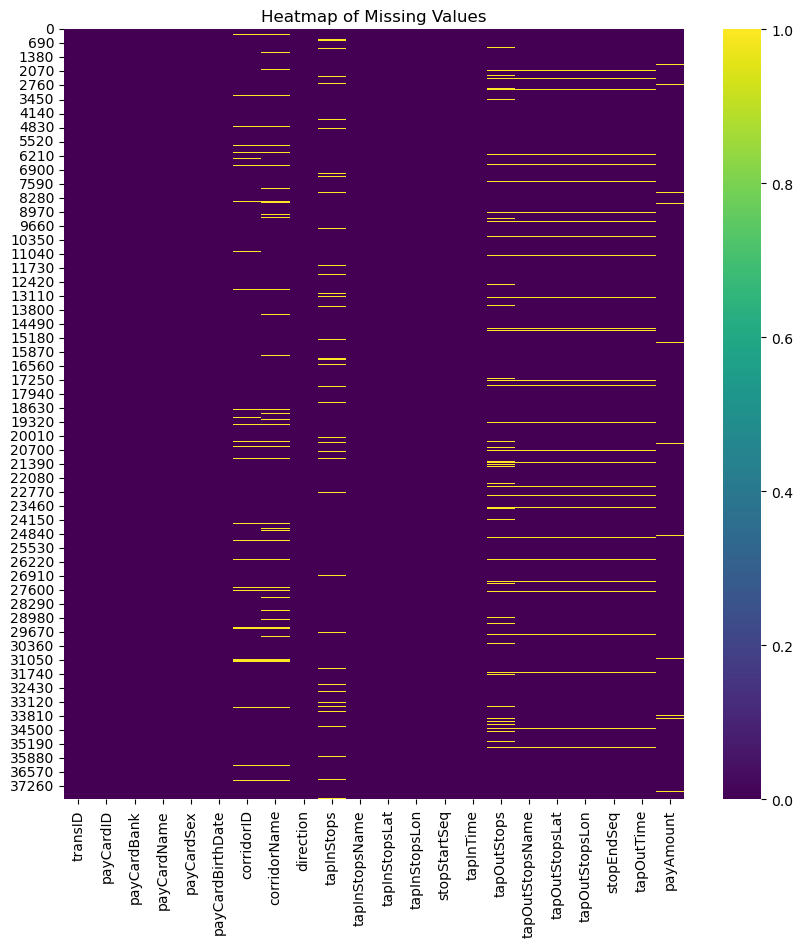

In [7]:
# Visual description of the missing values within the dataset.

column_names = [
    'transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 
    'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 
    'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 
    'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 
    'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 
    'payAmount'
]

plt.figure(figsize=(10, 10))
sns.heatmap(df[column_names].isna(), cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values')
plt.show()

In [8]:
# Check duplicate data

df.duplicated().sum()

0

In [9]:
# Check if there are any NaN values in the dataset that disguise as a string 'nan'

NaN_values = len(df[df.isin(['nan']).any(axis=1)])
print(f'there are {NaN_values} nan values')

there are 0 nan values


From the data, we can see that there are columns that has correlation with other columns.
<br>
the columns that correlates with other column are:
<br>
 - CorridorID
 - CorridorName
 - tapInStops
 - tapInStopsName
 - tapOutStops
 - tapOutStopsName

We can work with these columns by mapping each other and fill accordingly

In [10]:
# Filling corridorID and corridorName
# First, fill the column with 'Unknown'
df['corridorID'].fillna('Unknown', inplace=True)
df['corridorName'].fillna('Unknown', inplace=True)


In [11]:
# Step 1: Select the known corridors
known_corridor = df[(df['corridorID'] != 'Unknown') & (df['corridorName'] != 'Unknown')]

# Step 2: Create mapping dictionaries
id_to_name = known_corridor.set_index('corridorID')['corridorName'].to_dict()
name_to_id = known_corridor.set_index('corridorName')['corridorID'].to_dict()

# Step 3: Fill missing values using mapping dictionaries
df['corridorName'] = df['corridorName'].where(df['corridorName'].notna(), df['corridorID'].map(id_to_name))
df['corridorID'] = df['corridorID'].where(df['corridorID'].notna(), df['corridorName'].map(name_to_id))

# Step 4: Drop Unknown rows
df = df[df['corridorID'] != 'Unknown']
df = df[df['corridorName'] != 'Unknown']


In [12]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops          1144
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2158
tapOutStopsName     1263
tapOutStopsLat      1263
tapOutStopsLon      1263
stopEndSeq          1263
tapOutTime          1263
payAmount            955
dtype: int64

In [13]:
# Same as previous cell
# Filling tapInStops and tapInStopsName
# First, fill the column with 'Unknown'
df['tapInStops'].fillna('Unknown', inplace=True)
df['tapInStopsName'].fillna('Unknown', inplace=True)

In [14]:
# Step 1: Select the known tap in stops
known_tapIn = df[(df['tapInStops'] != 'Unknown') & (df['tapInStopsName'] != 'Unknown')]

# Step 2: Create mapping dictionaries
id_to_name_tapIn = known_corridor.set_index('tapInStops')['tapInStopsName'].to_dict()
tapIn_to_id = known_corridor.set_index('tapInStopsName')['tapInStops'].to_dict()

# Step 3: Fill missing values using mapping dictionaries
df['tapInStopsName']  = df['tapInStopsName'].where(df['tapInStopsName'].notna(), df['tapInStops'].map(id_to_name))
df['tapInStops'] = df['tapInStops'].where(df['tapInStops'].notna(), df['tapInStopsName'].map(name_to_id))

# Step 4: Drop unknown tap in stops
df = df[df['tapInStops'] != 'Unknown']
df = df[df['tapInStopsName'] != 'Unknown']

In [15]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2099
tapOutStopsName     1228
tapOutStopsLat      1228
tapOutStopsLon      1228
stopEndSeq          1228
tapOutTime          1228
payAmount            922
dtype: int64

In [16]:
df['tapOutStops'].fillna('Unknown', inplace=True)
df['tapOutStopsName'].fillna('Unknown', inplace=True)

In [17]:
# Step 1: Select the known tap out stops
known_tapOut = df[(df['tapOutStops'] != 'Unknown') & (df['tapOutStopsName'] != 'Unknown')]

# Step 2: Create mapping dictionaries
id_to_name_tapOut = known_corridor.set_index('tapOutStops')['tapOutStopsName'].to_dict()
tapOut_to_id = known_corridor.set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Step 3: Fill missing values using mapping dictionaries
df['tapOutStopsName']  = df['tapOutStopsName'].where(df['tapOutStopsName'].notna(), df['tapOutStops'].map(id_to_name))
df['tapOutStops'] = df['tapOutStops'].where(df['tapOutStops'].notna(), df['tapOutStopsName'].map(name_to_id))

# Step 4: Drop the unknown rows
df = df[df['tapOutStops'] != 'Unknown']
df = df[df['tapOutStopsName'] != 'Unknown']

In [18]:
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           865
dtype: int64

Now, we deal with the numeric data that is the column:
<br>
 - payAmount
 - stopEndSeq

In [19]:
# First we need to do statistical analysis on the data to check if the data is normal or not.
# We use the D’Agostino and Pearson’s statistical test for this column.
from scipy.stats import normaltest

pay_amount = df['payAmount'].dropna()
stop_end_seq = df['stopEndSeq'].dropna()

statistic_pay, p_value_pay = normaltest(pay_amount)
print(f"Pay Amount - Statistic: {statistic_pay}, p-value: {p_value_pay}")

statistic_seq, p_value_seq = normaltest(stop_end_seq)
print(f"Stop End Sequence - Statistic: {statistic_seq}, p-value: {p_value_seq}")


Pay Amount - Statistic: 20485.860940132025, p-value: 0.0
Stop End Sequence - Statistic: 2864.9838088829156, p-value: 0.0


From the test result above, we can conclude that the distribution data for both column is not normal.
Therefore, we can fill the missing values with median.

In [20]:
df['payAmount'].fillna(df['payAmount'].median(), inplace=True)
df['stopEndSeq'].fillna(df['stopEndSeq'].median(), inplace=True)

In [21]:
# Change the time columns in the correct format.

df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])


In [22]:
df.isnull().sum()   

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [23]:
NaN_values = len(df[df.isin(['nan']).any(axis=1)])
print(f'there are {NaN_values} nan values')

there are 0 nan values


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32595 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32595 non-null  object        
 1   payCardID         32595 non-null  int64         
 2   payCardBank       32595 non-null  object        
 3   payCardName       32595 non-null  object        
 4   payCardSex        32595 non-null  object        
 5   payCardBirthDate  32595 non-null  int64         
 6   corridorID        32595 non-null  object        
 7   corridorName      32595 non-null  object        
 8   direction         32595 non-null  float64       
 9   tapInStops        32595 non-null  object        
 10  tapInStopsName    32595 non-null  object        
 11  tapInStopsLat     32595 non-null  float64       
 12  tapInStopsLon     32595 non-null  float64       
 13  stopStartSeq      32595 non-null  int64         
 14  tapInTime         3259

In [25]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [26]:
df.to_excel('Capstone_2_cleaned.xlsx')

KeyboardInterrupt: 

**Data has been properly cleaned!**
<br>
**Now proceed to EDA**

C:\Users\Asus\AppData\Local\Temp\ipykernel_15948\1756553812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


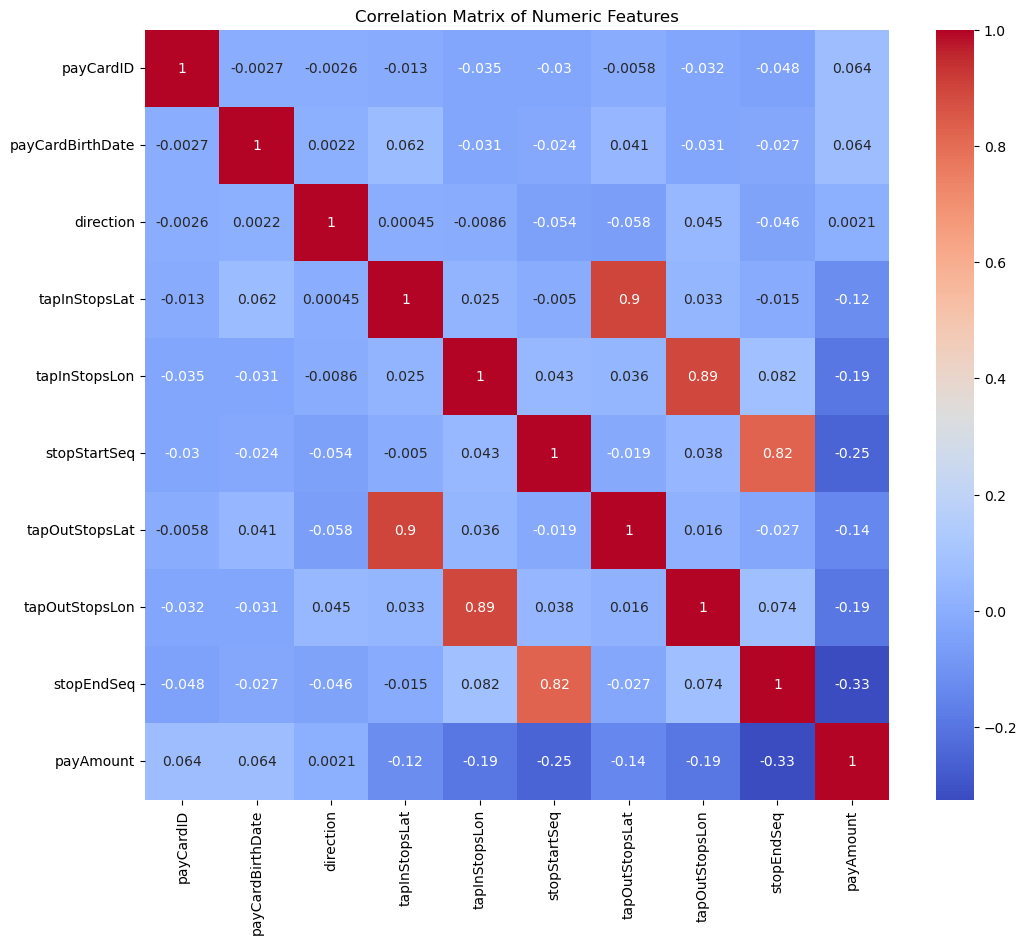

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Question 1: Are certain routes or corridors underutilized or overburdened?**
<br>
<br>
In order to analyse this, we need to see the corridorID and the direction of the corridor.
<br>
Then, we can see the traffic counts.

In [28]:
# Creating corridor_traffic by grouping by corridorID and direction

corridor_traffic = df.groupby(['corridorID', 'direction']).size().unstack(fill_value=0)
corridor_traffic.columns = ['Back', 'Go']

# Establish the threshold of the dataset

mean_go = corridor_traffic['Go'].mean()
mean_back = corridor_traffic['Back'].mean()

print(f"Mean Go: {mean_go}, Mean Back: {mean_back}")

Mean Go: 73.82805429864253, Mean Back: 73.6606334841629


The mean for Go and Back is roughly 74
<br>
For the threshold we can use twice of the mean, which is 148.5

In [34]:
# Threshold
congestion_threshold = 148

# Finding congested corridors with the new threshold
congested_corridors = corridor_traffic[
    (corridor_traffic['Go'] > congestion_threshold) & 
    (corridor_traffic['Back'] > congestion_threshold)
]

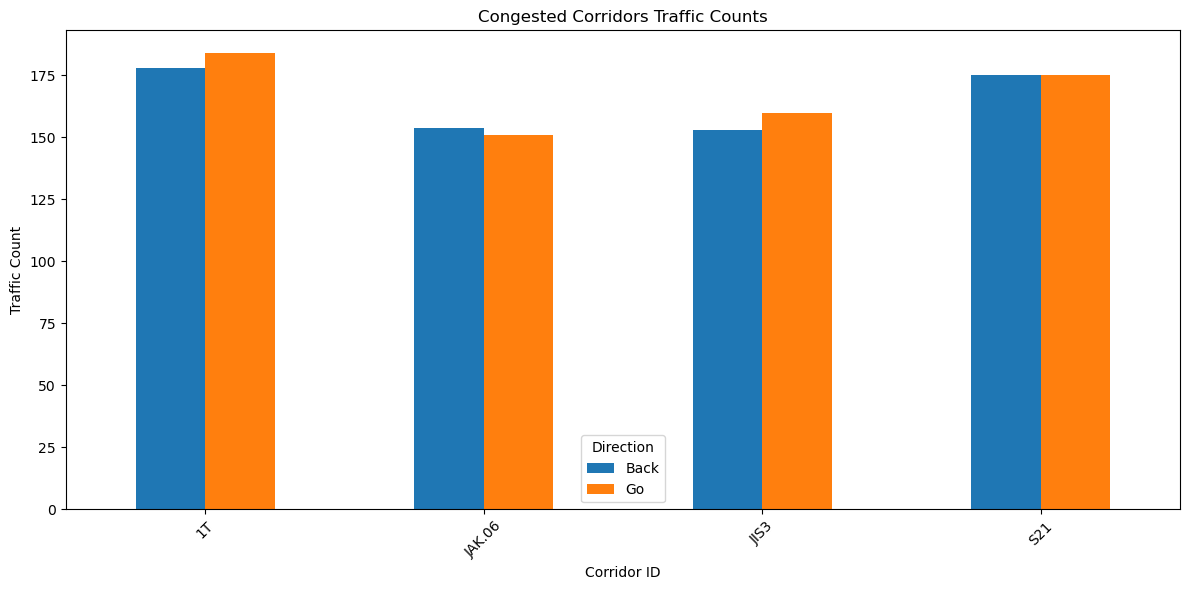

In [35]:
# Plot the congested corridors traffic counts

congested_corridors.plot(kind='bar', figsize=(12, 6))
plt.title('Congested Corridors Traffic Counts')
plt.xlabel('Corridor ID')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

For the underutilized traffic threshold, we can use 80% of the mean value.

In [32]:
# Define the mean and calculate the underutilized threshold as 80% of the mean
mean_travel_time = (mean_go + mean_back) / 2
underutilized_threshold = 0.8 * mean_travel_time  

# Finding underutilized corridors with the new threshold
underutilized_corridors = corridor_traffic[
    (corridor_traffic['Go'] < underutilized_threshold) & 
    (corridor_traffic['Back'] < underutilized_threshold)
]



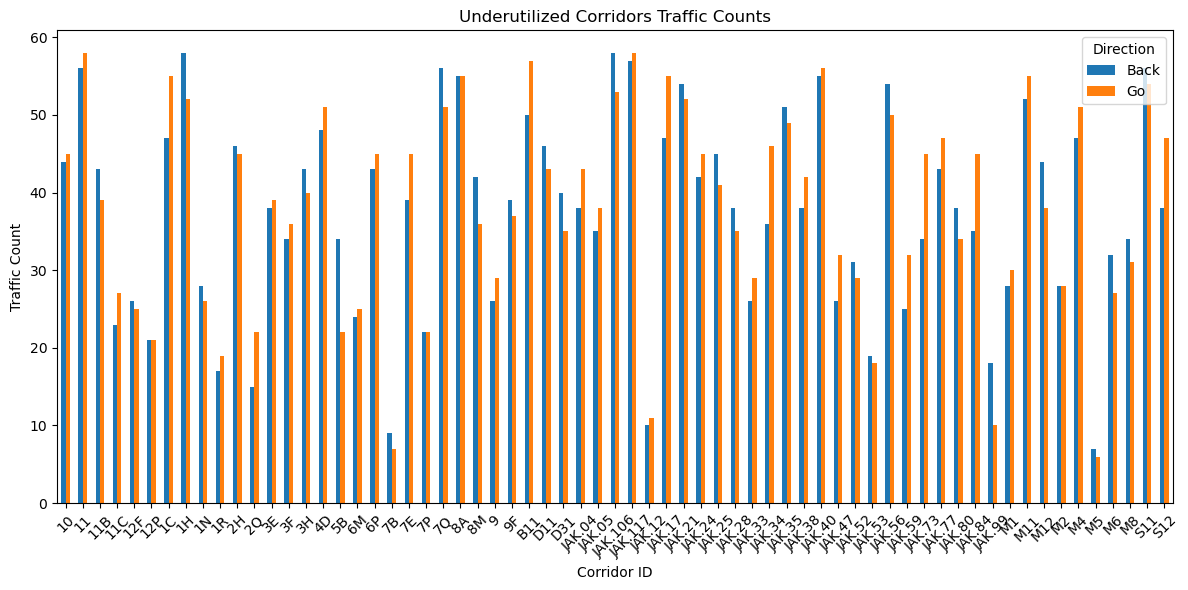

In [33]:
underutilized_corridors.plot(kind='bar', figsize=(12, 6))
plt.title('Underutilized Corridors Traffic Counts')
plt.xlabel('Corridor ID')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

When examining the two graphs, it is evident that there is a significant disparity between them: 
<br>
the congested corridors are fewer in number compared to the underutilized corridors,
<br>
with the former exhibiting overwhelming traffic levels while the latter reflect minimal activity.

**Question 2:  Do different demographic groups (age, gender) show distinct travel patterns?**
<br>
In order to analyse this, we need age column

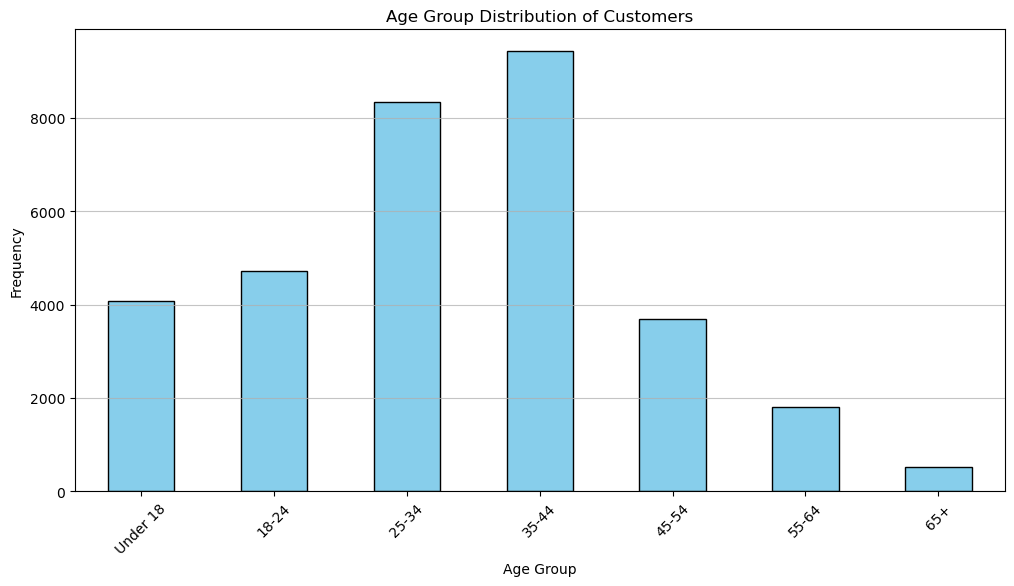

In [36]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['payCardBirthDate']

# Define age groups
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Count the frequency of each age group
age_group_distribution = df['Age Group'].value_counts().sort_index()

# Plot the age group distribution
plt.figure(figsize=(12, 6))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  
plt.show()

From the graph above, we can see that the most frequent use of Transjakarta is used by the age group of 35-44
<BR>
Now, we analyze the travel frequency by age and gender.

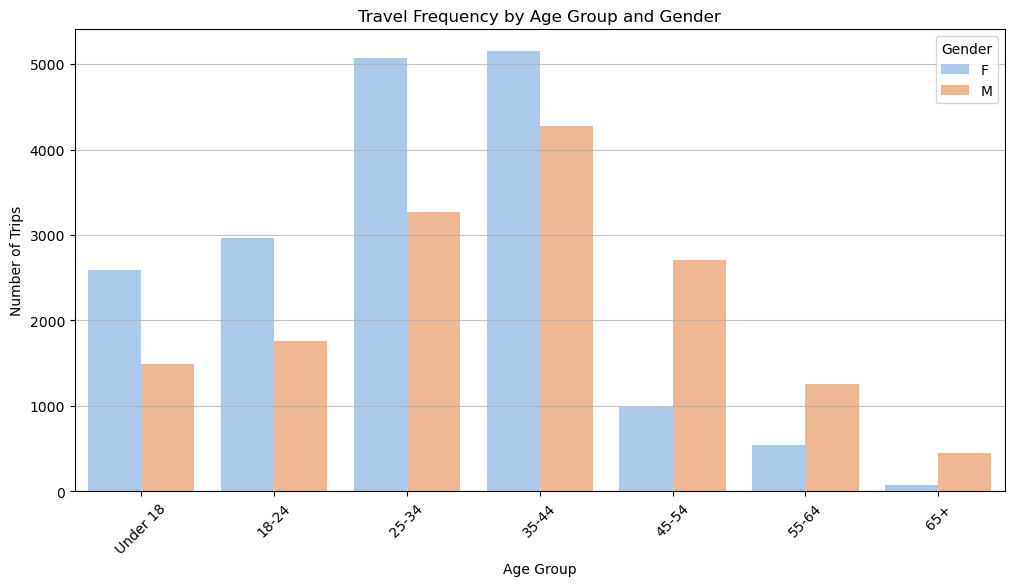

In [37]:
# Create new column that represent travel frequency by age group and gender
travel_frequency = df.groupby(['Age Group', 'payCardSex']).size().reset_index(name='TripCount')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=travel_frequency, x='Age Group', y='TripCount', hue='payCardSex', palette='pastel')
plt.title('Travel Frequency by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)  
plt.show()

We can see from the graph above the most frequent user of Transjakarta is Female from the age group of Under 18 until 35-44
<br>
The age group of 45-54 until 65+ shows the most frequent user of Transjakarta is in fact male.

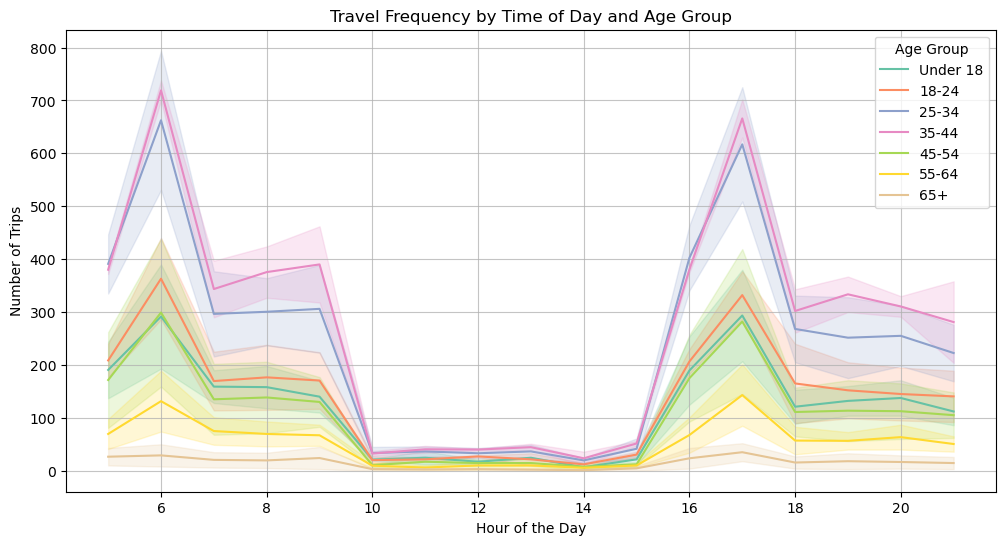

In [38]:
# Create a new column for the hour of the day when the tap-in occurred

df['tapInHour'] = df['tapInTime'].dt.hour

# Time of travel analysis

time_of_travel = df.groupby(['tapInHour', 'Age Group', 'payCardSex']).size().reset_index(name='TripCount')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_of_travel, x='tapInHour', y='TripCount', hue='Age Group', palette='Set2')
plt.title('Travel Frequency by Time of Day and Age Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Age Group')
plt.grid(alpha=0.75)
plt.show()

There are 2 peak hours in the data that is 6 AM and 5 PM. The most frequent user is age group of 25-34 and 35-44

**Question 3: Are there specific stops where passengers frequently tap in or out?**
<br>
Now we want to see where is the most frequent stop for passengers to tap in or out. 
<br>
We can do this by counting the number of trips that start or end at each stop.
<br>
We can then sort the stops by the number of trips and identify the top 10 most frequent stops.

In [39]:
# Create variables for the top 10 tap-in and tap-out stops in the dataset.

top_tap_in_stops = df['tapInStopsName'].value_counts().head(10)
top_tap_out_stops = df['tapOutStopsName'].value_counts().head(10)

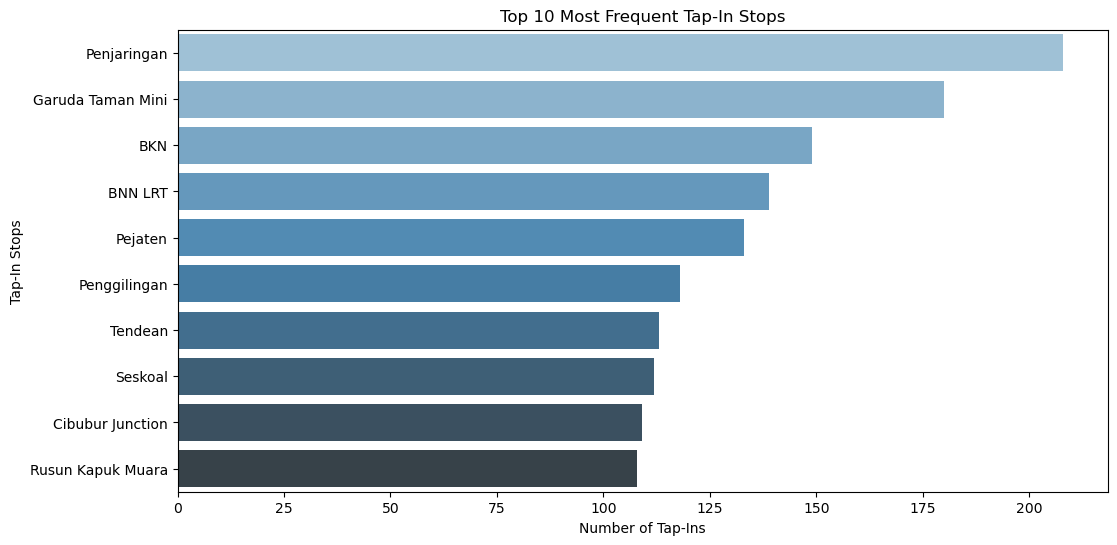

In [40]:
# Plot the top 10 Tap in spots

plt.figure(figsize=(12, 6))
sns.barplot(x=top_tap_in_stops.values, y=top_tap_in_stops.index, palette="Blues_d")
plt.title('Top 10 Most Frequent Tap-In Stops')
plt.xlabel('Number of Tap-Ins')
plt.ylabel('Tap-In Stops')
plt.show()

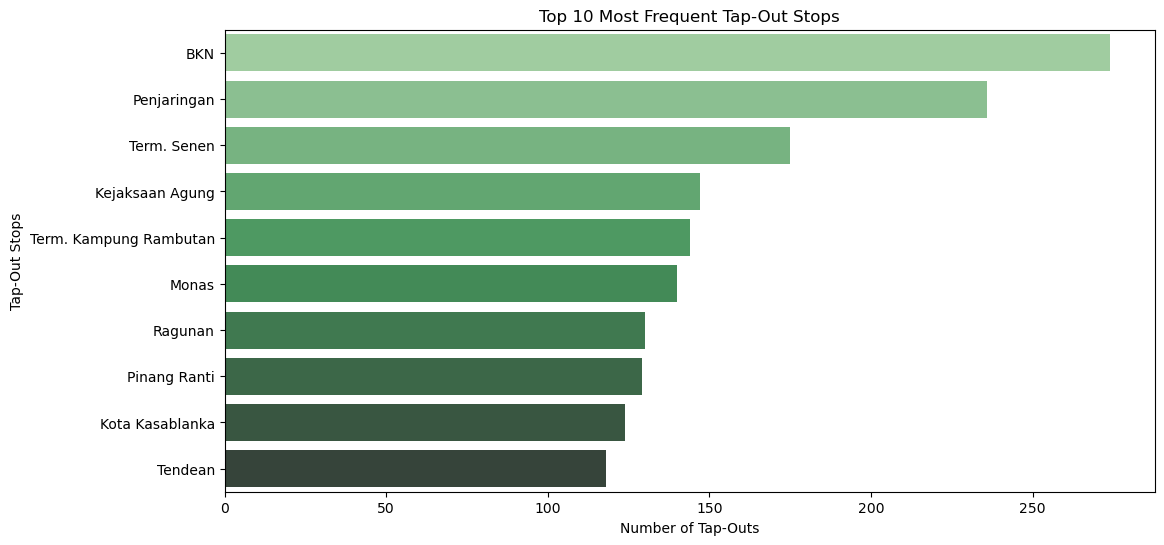

In [41]:
# Plot the top 10 tap out stops

plt.figure(figsize=(12, 6))
sns.barplot(x=top_tap_out_stops.values, y=top_tap_out_stops.index, palette="Greens_d")
plt.title('Top 10 Most Frequent Tap-Out Stops')
plt.xlabel('Number of Tap-Outs')
plt.ylabel('Tap-Out Stops')
plt.show()

The top most tap in stop is in Penjaringan while the top most tap out spot is in BKN.

**Question 4: Are there typical trip duration patterns, and how consistent is the Transjakarta service in meeting expected travel times?**
<br>
Now, we want to see the distribution of trip durations to determine if there are
<br>
typical travel times for Transjakarta passengers and assess the consistency of service



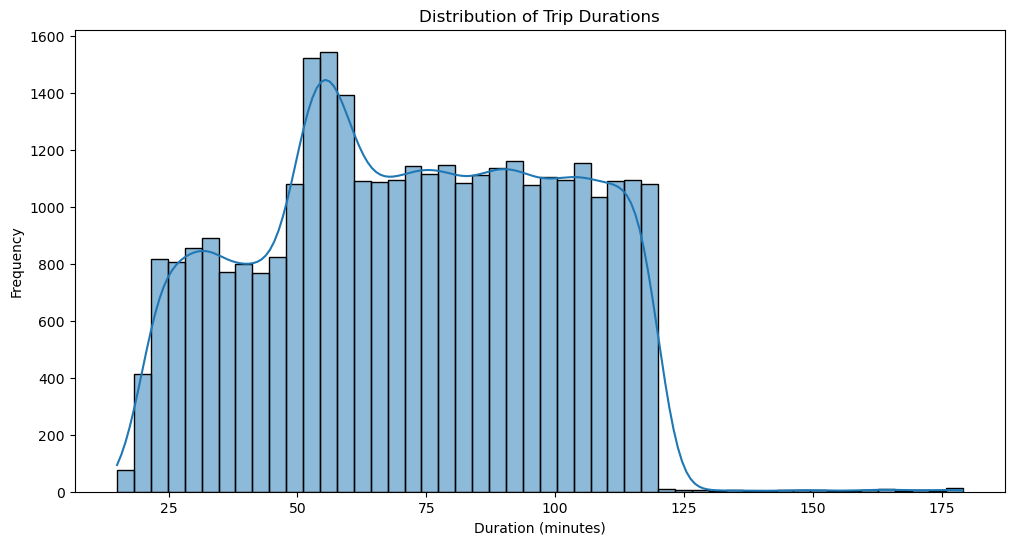

In [42]:
# Calculate trip duration in minutes
df['tripDuration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Trip duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['tripDuration'], bins=50, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Now let's see the summary statistics for the data

In [43]:
mean_duration = df['tripDuration'].mean()
median_duration = df['tripDuration'].median()
std_dev_duration = df['tripDuration'].std()

print(f"Mean Duration: {mean_duration} minutes")
print(f"Median Duration: {median_duration} minutes")
print(f"Standard Deviation: {std_dev_duration} minutes")

Mean Duration: 72.22993710691823 minutes
Median Duration: 72.1 minutes
Standard Deviation: 28.06934878497467 minutes


After we identify the mean and the standard deviation of the data, we need to find the outlier and analyze them.
<br>
To identify the outlier, we will use the interquartile range method.

In [44]:
Q1 = df['tripDuration'].quantile(0.25)
Q3 = df['tripDuration'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df['tripDuration'] > (Q3 + 1.5 * IQR)]

print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 37


There are a total of 37 outliers in the trip. We can further analyze the outliers to see where exactly they are located. We also want to count the number of trips during operation hours.

In [45]:
outlier_corridors = outliers['corridorName'].value_counts()
outlier_times = outliers['tapInTime'].dt.hour.value_counts()

print("Corridors with Outliers: ")
print(outlier_corridors.head())


Corridors with Outliers: 
Matraman Baru - Ancol                   2
Kp. Rambutan - Kalisari                 2
Rusun Pinus Elok - Rusun Pulo Gebang    1
Kampung Rambutan - Tanjung Priok        1
Rusun Sindang Koja - Kp. Sawah          1
Name: corridorName, dtype: int64


In [46]:
print("Hours with Outliers: ")
print(outlier_times.sort_index())

Hours with Outliers: 
5     1
6     4
7     3
8     1
9     4
10    3
13    4
14    3
15    2
16    2
17    5
18    1
19    1
20    2
21    1
Name: tapInTime, dtype: int64


From the output, the corridor that gives most contribution to the outlier clustered in two corridor that is the Matraman Baru - Ancol and Kp. Rambutan - Kalisari

From the breakdown of the operation hour, we can identify the peak hours are in 6 AM, 9 AM, and 5 PM, aligned with the rush hours, suggesting during these hours, the trip hours may go longer.

**Question 5: How does the distribution of users vary across different banks and age groups?**
Now, we want to analyze the average payment amounts associated with different bank cards used by passengers.

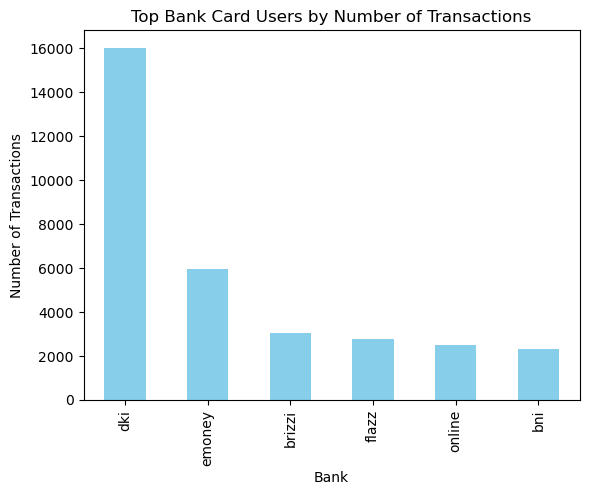

In [47]:
# Group data by the Bank card used and count the number of transactions for each bank
df['payCardBank'].value_counts().plot(kind='bar', color='skyblue')

#Plot the graph
plt.title('Top Bank Card Users by Number of Transactions')
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

From the graph, DKI has the highest average payment amount among the banks analyzed.

We can also do deeper analysis by comparing with different age group

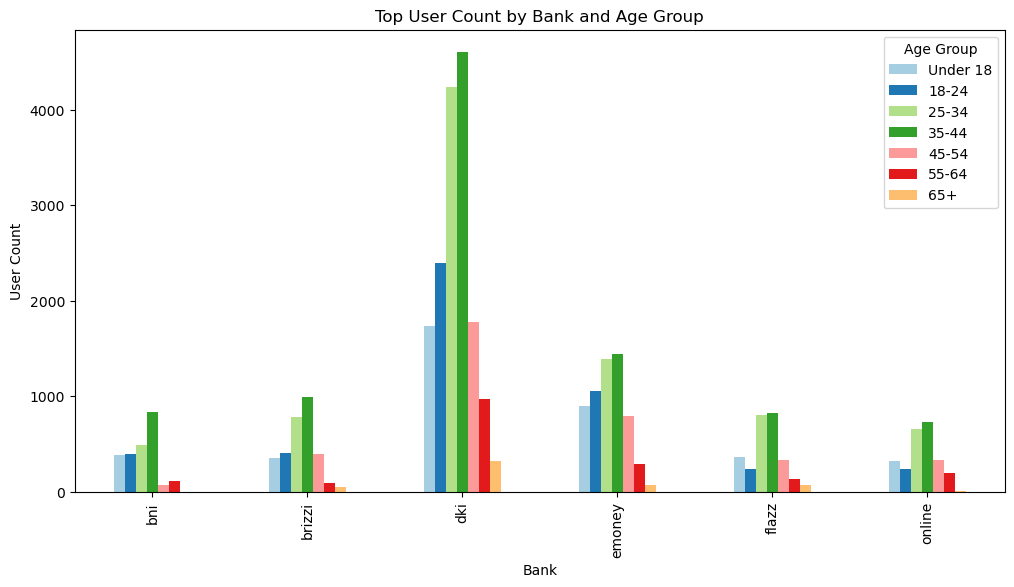

In [48]:
# Example: Group by bank and age group, then calculate the average payment amount
user_count_by_bank_age = df.groupby(['payCardBank', 'Age Group']).size().unstack()

# Plotting
user_count_by_bank_age.plot(kind='bar', figsize=(12, 6), color=plt.cm.Paired.colors)
plt.title('Top User Count by Bank and Age Group')
plt.xlabel('Bank')
plt.ylabel('User Count')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.show()

From the graph, we can see that the bank DKI has the highest user counts across almost all age groups, indicating its strong presence and appeal. Brizzi follows closely, particularly excelling among the 25-34 and 35-44 age groups, suggesting effective marketing or product offerings for these demographics.

**Question 6: What is the distribution of trip directions among passengers using Transjakarta?**

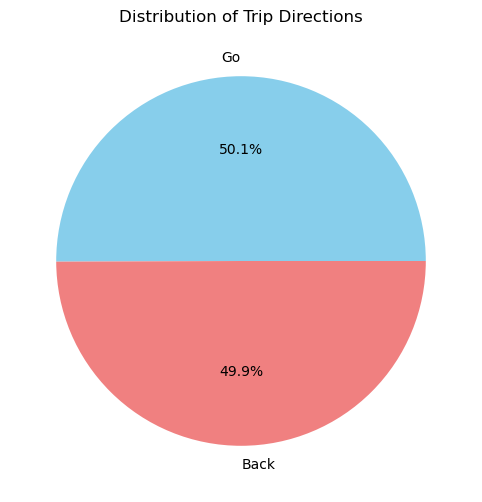

In [ ]:
# Trip direction pie chart with specified colors
plt.figure(figsize=(8, 6))
df['direction'] = df['direction'].map({1.0: 'Go', 0.0: 'Back'})
direction_counts = df['direction'].value_counts()

# Plotting with specific colors
direction_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Trip Directions')
plt.ylabel('')  
plt.show()


From the graph, it shows the data nearly evenly split between the "Go" and "Back" directions. This indicates a balanced travel pattern, suggesting that passengers frequently utilize both directions

**Question 7: What is the distribution of customer gender among passengers using the service?**

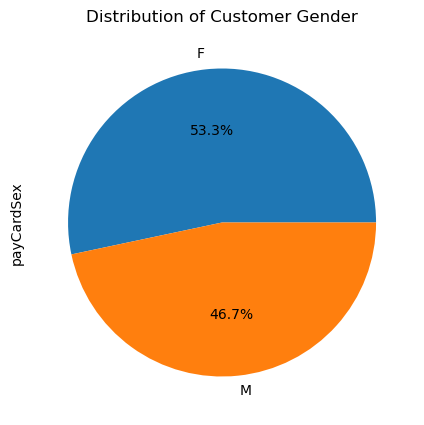

In [50]:
# Gender distribution
plt.figure(figsize=(10, 5))
df['payCardSex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customer Gender')
plt.show()

This indicates a slight majority of female passengers utilizing the service, which the female takes a 53.3 percent of the total user

## Conclusion ##

 - The most frequent users of Transjakarta services fall within the 35-44 age group, indicating a high reliance on public transportation among middle-aged individuals. This age group likely represents a significant portion of the working population, which can guide targeted service improvements for commuters in this demographic.
 <br>
 - Female passengers dominate usage among younger age groups (Under 18 to 35-44), while male users become more frequent from ages 45-54 onward. This pattern could highlight differences in commuting needs or social dynamics across age groups and genders. Understanding these trends could help Transjakarta tailor its services or marketing efforts to better serve and engage these varying groups.
 <br>
 - Peak usage times occur at 6 AM and 5 PM, primarily among the 25-34 and 35-44 age groups, reinforcing the connection to commuting hours for working adults. This insight can guide resource allocation, with the potential to enhance service frequency or capacity during peak hours to accommodate this demand.
 <br>
 - The most frequent tap-in location is Penjaringan, while the most frequent tap-out location is BKN. These hotspots suggest areas of high commuter activity, which might benefit from increased service availability or infrastructure improvements. Conversely, underutilized stops could be candidates for service adjustments.
 <br>
 - With an average trip duration of around 72 minutes, it is apparent that Transjakarta services support longer commutes. A few outliers were found, predominantly along specific corridors and during peak hours, indicating potential service inefficiencies or delays in these segments. Further investigation could help optimize travel times and improve passenger satisfaction.
 <br>
 - The distribution of trip directions is nearly balanced, with 50.1% of trips going forward ("Go") and 49.9% returning ("Back"). This balance suggests that Transjakarta effectively serves both directions of travel, indicating stability in commuter flow patterns. However, additional insights into directional peaks could further refine scheduling and service efficiency.
 <br>
 - The gender split among Transjakarta users is approximately 53.3% female and 46.7% male. This slight female majority could influence the company’s approach to service design, safety initiatives, and marketing strategies to better meet the preferences and needs of female passengers.
 <br>
 - DKI is the dominant bank among users, with the highest number of customers in most age categories. This suggests that DKI has successfully captured a broad demographic, making it a strong player in the market.

## Recommendation ##
 -  Since the 35-44 age group represents a significant portion of users, Transjakarta could enhance its services to better serve this demographic by focusing on reliable and efficient commuting options during peak hours. Additionally, consider introducing commuter benefits or loyalty programs that specifically target working adults, perhaps in partnership with employers.
 - Transjakarta could implement targeted marketing campaigns that highlight safety and convenience for women, especially in younger age groups. Tailoring services or adding features to improve safety and comfort for women, such as women-only seating during specific hours, could increase satisfaction. For older male users, services could focus on providing enhanced accessibility or seating comfort.
 - Increase service frequency or add larger buses during peak commute times (6 AM and 5 PM) to accommodate the 25-44 age group. Allocating additional resources to handle this demand could alleviate overcrowding and improve travel times. Moreover, Transjakarta might consider adjusting pricing to incentivize off-peak travel for passengers with more flexible schedules.
 - Given the high demand at Penjaringan and BKN, Transjakarta could invest in infrastructure improvements at these locations, such as larger waiting areas, additional signage, and better seating. The company might also consider adjusting routes to offer express services or additional options from these locations to enhance accessibility and reduce travel times for frequent users.
 - Identify specific factors causing prolonged travel times on corridors with outliers (e.g., Matraman Baru - Ancol, Kp. Rambutan - Kalisari) by analyzing traffic patterns, stop frequency, and demand. Transjakarta could introduce route optimizations, such as limited-stop services, on longer corridors to minimize delays. Additionally, implementing real-time tracking and passenger alerts could improve the travel experience by managing expectations around trip duration.
 - With an almost equal split in directional flow, Transjakarta’s resource allocation for morning and evening trips appears balanced. However, to further optimize, consider analyzing peak directional flow within specific time blocks to deploy buses more dynamically (e.g., more buses in the “Go” direction in the morning, and “Back” in the evening) based on fluctuating demand.
 - The slight majority of female users could guide Transjakarta to implement gender-specific improvements. For example, expanding safety measures, especially during evening hours, could make the service more attractive for women. Transjakarta could also enhance amenities and security features, such as surveillance, to boost comfort and peace of mind for all passengers.
 - Banks like Brizzi and DKI should continue to focus on their successful marketing strategies, especially targeting the 25-34 and 35-44 age groups to further enhance their customer base. They could introduce loyalty programs or special promotions aimed at these demographics.